# **Multiple linear regression**(06-07-2024)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

# Access the data and get its shape
data_shape = diabetes_data.data.shape

print(data_shape)

(442, 10)


In [3]:
x=diabetes_data.data
y=diabetes_data.target

In [4]:
print(x.shape)
print(y.shape)

(442, 10)
(442,)


# Using SKlearns linear regression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
diab=LinearRegression()

In [10]:
diab.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=diab.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test,y_pred)

0.4526027629719195

In [14]:
diab.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [15]:
diab.intercept_

151.34560453985995

# Linear regression with class(normal equation)

In [16]:
class diabetes:
  def __init__(self):
    self.coef=None
    self.intercept=None

  def fit(self,x_train,y_train):
    x_train=np.insert(x_train,0,1,axis=1)  ## Add a column of ones to x_train to account for the intercept
    coeff=np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)  ## Compute the coefficients using the normal equation
    self.intercept=coeff[0]
    self.coef=coeff[1:]

  def predict(self,x_test):
    y_pred=np.dot(x_test,self.coef)+self.intercept
    return y_pred


In [17]:
lr=diabetes()

In [18]:
lr.fit(x_train,y_train)

In [19]:
y_pred=lr.predict(x_test)

In [20]:
r2_score(y_test,lr.predict(x_test))

0.4526027629719199

In [21]:
lr.coef

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [22]:
lr.intercept

151.34560453986003

In [23]:
results_dff = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred,
    'Difference (Actual - Predicted)': y_test - y_pred
})

# Print the DataFrame
print(results_dff)

    Actual Values  Predicted Values  Difference (Actual - Predicted)
0           219.0        139.547558                        79.452442
1            70.0        179.517208                      -109.517208
2           202.0        134.038756                        67.961244
3           230.0        291.417029                       -61.417029
4           111.0        123.789659                       -12.789659
..            ...               ...                              ...
84          153.0        115.011800                        37.988200
85           98.0         78.955842                        19.044158
86           37.0         81.560873                       -44.560873
87           63.0         54.379973                         8.620027
88          184.0        166.254352                        17.745648

[89 rows x 3 columns]


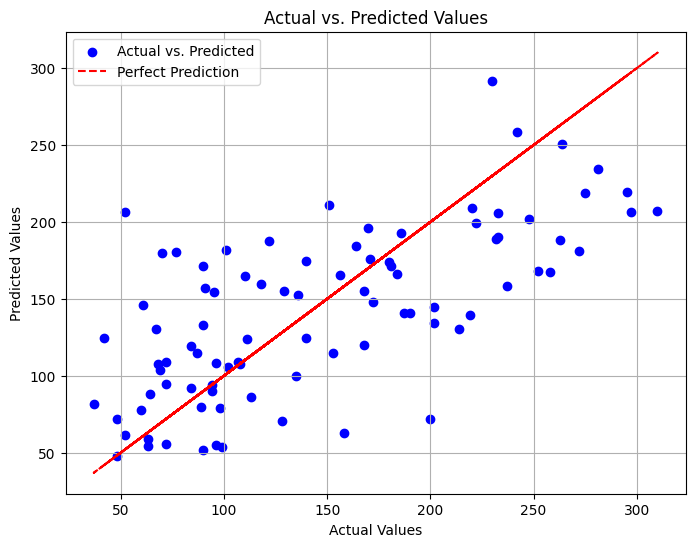

In [24]:
import matplotlib.pyplot as plt

# Assuming y_test and y_predi are your actual and predicted values, respectively
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

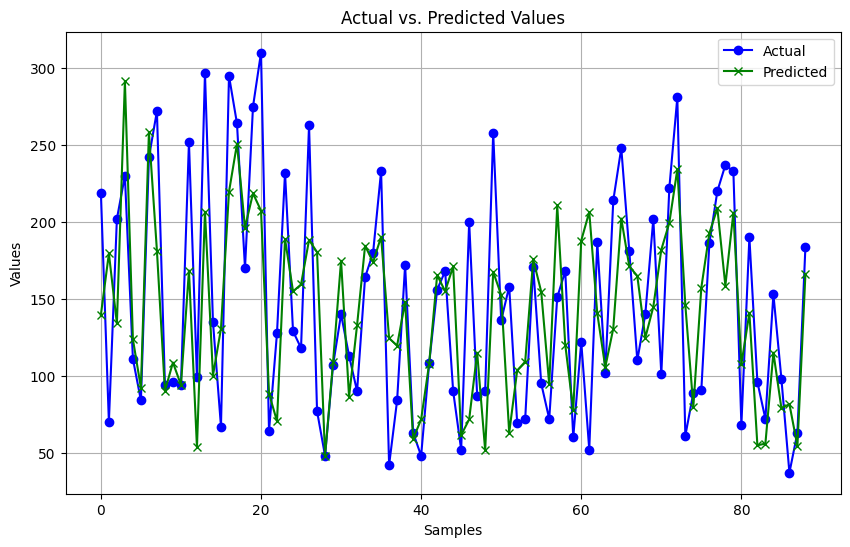

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', color='blue', label='Actual')
plt.plot(y_pred, marker='x', color='green', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Linear regression using Gradient Descent

In [26]:
def Diabetes (x_train,y_train, learning_rate=1.0, n_iterations=1000):
    m, n = x_train.shape
    coef = np.zeros(n)
    intercept = 0

    for _ in range(n_iterations):
        y_predi = np.dot(x_train, coef) + intercept
        error = y_predi - y_train

        d_coef = (1/m) * np.dot(x_train.T,error)
        d_intercept = (1/m) * np.sum(error)

        coef -= learning_rate * d_coef
        intercept -= learning_rate * d_intercept

    return coef, intercept,y_predi

In [27]:
coef, intercept,y_predi=Diabetes(x_train,y_train)

In [28]:
print(coef)

[  41.84021485 -203.43035607  509.51096162  325.12611198  -70.74930656
 -119.38213201 -216.46035073  144.31034433  376.46263208  111.96807687]


In [29]:
predictions = np.dot(x_test, coef) + intercept

In [30]:
r2 = r2_score(y_test, predictions)
print("R-squared score on test set:", r2)

R-squared score on test set: 0.4588840149460641


In [31]:
intercept

151.37258375185516

In [32]:
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': predictions,
    'Difference (Actual - Predicted)': y_test - predictions
})

# Print the DataFrame
print(results_df)

    Actual Values  Predicted Values  Difference (Actual - Predicted)
0           219.0        142.619041                        76.380959
1            70.0        177.213006                      -107.213006
2           202.0        141.797143                        60.202857
3           230.0        289.430094                       -59.430094
4           111.0        124.898846                       -13.898846
..            ...               ...                              ...
84          153.0        113.073744                        39.926256
85           98.0         88.631973                         9.368027
86           37.0         78.415486                       -41.415486
87           63.0         64.160206                        -1.160206
88          184.0        158.142890                        25.857110

[89 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

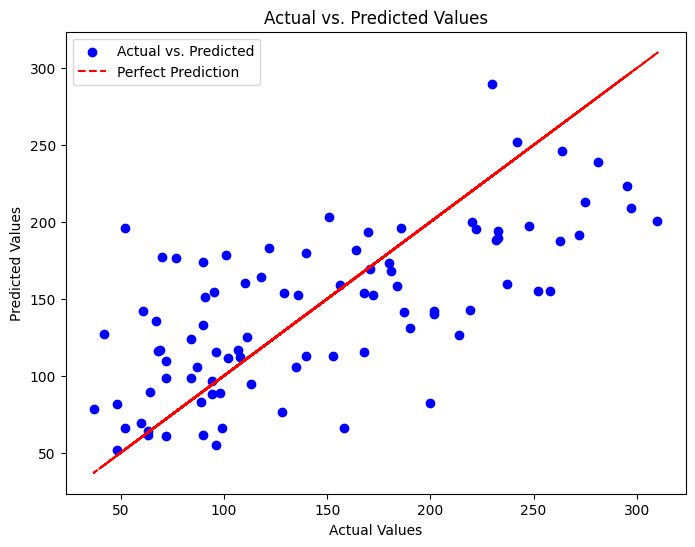

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show

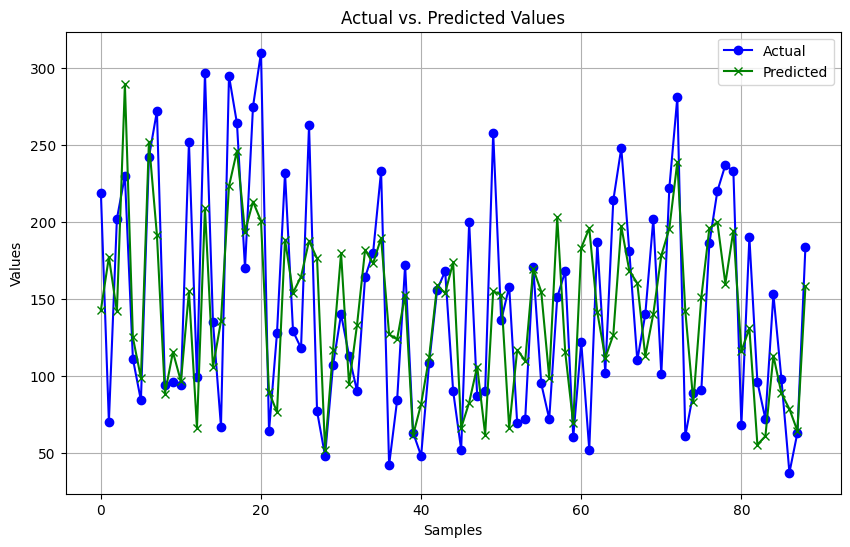

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, marker='o', color='blue', label='Actual')
plt.plot(predictions, marker='x', color='green', label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()